<a href="https://colab.research.google.com/github/M20Jay/Data-Science-Portfolio/blob/main/Credit_Card_Fraud_Detection_Using_Predictive_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
"""
 Credit Card Fraud Detection Using Predictive Analytics
 ============================================================================
Business Problem:
A bank loses $2M annually to fraud. How can we detect fraudulent transactions in real-time?

Dataset Information:
- Source: Kaggle Credit Card Fraud Detection Dataset
- 284,807 transactions
- 31 columns (Time, V1-V28, Amount, Class)
- Highly imbalanced dataset
- Target: Class (0 = legitimate, 1 = fraud)
"""


'\nBUSI 652 - Assignment 1: ABT Design\nStudent Name: Feshalkhan Inayatulakhan Pathan\n\nBusiness Problem: \nA bank loses $2M annually to fraud. How can we detect fraudulent transactions in real-time?\n\nDataset Information:\n- Source: Kaggle Credit Card Fraud Detection Dataset\n- 284,807 transactions\n- 31 columns (Time, V1-V28, Amount, Class)\n- Highly imbalanced dataset\n- Target: Class (0 = legitimate, 1 = fraud)\n'

In [ ]:
# ============================================================================
# STEP 1: Import Required Libraries
# ============================================================================


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [ ]:
# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("=" * 80)
print("CREDIT CARD FRAUD DETECTION - EXPLORATORY DATA ANALYSIS")
print("=" * 80)


CREDIT CARD FRAUD DETECTION - EXPLORATORY DATA ANALYSIS


In [ ]:
# ============================================================================
# STEP 2: Load the Dataset
# ============================================================================

print("\n[STEP 1] Loading Dataset...")
print("-" * 80)
df = pd.read_excel('/content/drive/MyDrive/Python Dataset/Datasets/creditcard.xlsx')
print(f"Dataset shape: {df.shape[0]} rows, {df.shape[1]} columns")


[STEP 1] Loading Dataset...
--------------------------------------------------------------------------------
Dataset shape: 284807 rows, 31 columns


In [ ]:
# ============================================================================
# STEP 3: Initial Data Exploration
# ============================================================================

In [ ]:
print("\n[STEP 2] Initial Data Exploration")
print("-" * 80)
# Display first few rows to understand the data structure
print("\nFirst 5 rows of the dataset:")
print(df.head())

# Display basic information about the dataset
print("\n\nDataset Information:")
print(df.info())

# Display statistical summary of numerical columns
print("\n\nStatistical Summary:")
print(df.describe())

# Display column names
print("\n\nColumn Names:")
print(df.columns.tolist())


[STEP 2] Initial Data Exploration
--------------------------------------------------------------------------------

First 5 rows of the dataset:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10       V11       V12       V13       V14  \
0  0.098698  0.363787  0.090794 -0.551600 -0.617801 -0.991390 -0.311169   
1  0.085102 -0.255425 -0.166974  1.612727  1.065235  0.489095 -0.143772   
2  0.247676 -1.514654  0.207643  0.624501  0.066084  0.717293 -0.165946   
3  0.377436 -1.387024 -0.054952 -0.226487  0.178228  0.507757 -0.28

In [ ]:
# ============================================================================
# STEP 4: Check for Missing Values
# ============================================================================

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create a DataFrame to display missing value information
missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing Count': missing_values.values,
    'Percentage': missing_percentage.values
})
if len(missing_df) > 0:
    print("\nColumns with missing values:")
    print(missing_df)
else:
    print("\n✓ No missing values found in the dataset!")



Columns with missing values:
    Column  Missing Count  Percentage
0     Time              0         0.0
1       V1              0         0.0
2       V2              0         0.0
3       V3              0         0.0
4       V4              0         0.0
5       V5              0         0.0
6       V6              0         0.0
7       V7              0         0.0
8       V8              0         0.0
9       V9              0         0.0
10     V10              0         0.0
11     V11              0         0.0
12     V12              0         0.0
13     V13              0         0.0
14     V14              0         0.0
15     V15              0         0.0
16     V16              0         0.0
17     V17              0         0.0
18     V18              0         0.0
19     V19              0         0.0
20     V20              0         0.0
21     V21              0         0.0
22     V22              0         0.0
23     V23              0         0.0
24     V24          

In [ ]:
# ============================================================================
# STEP 5: Check for Duplicate Records
# ============================================================================

In [ ]:
print("\n[STEP 4] Checking for Duplicate Records")
print("-" * 80)


[STEP 4] Checking for Duplicate Records
--------------------------------------------------------------------------------


In [ ]:
#Count duplicate rows
duplicate_count = df.duplicated().sum()

print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count/len(df))*100:.2f}%")

    # Remove duplicates
    df_clean = df.drop_duplicates()
    print(f"\n✓ Duplicates removed!")
    print(f"New dataset shape: {df_clean.shape[0]} rows, {df_clean.shape[1]} columns")
    df = df_clean
else:
    print("✓ No duplicate records found!")


Number of duplicate rows: 1081
Percentage of duplicates: 0.38%

✓ Duplicates removed!
New dataset shape: 283726 rows, 31 columns


In [ ]:
# ============================================================================
# STEP 6: Analyze Class Imbalance
# ============================================================================


[STEP 5] Analyzing Class Distribution (Imbalance)
--------------------------------------------------------------------------------

Class Distribution:
Legitimate transactions (Class 0): 283,253
Fraudulent transactions (Class 1): 473

Percentage Distribution:
Legitimate: 99.83%
Fraudulent: 0.17%

⚠ Dataset is HIGHLY IMBALANCED (Imbalance Ratio: 598.8:1)


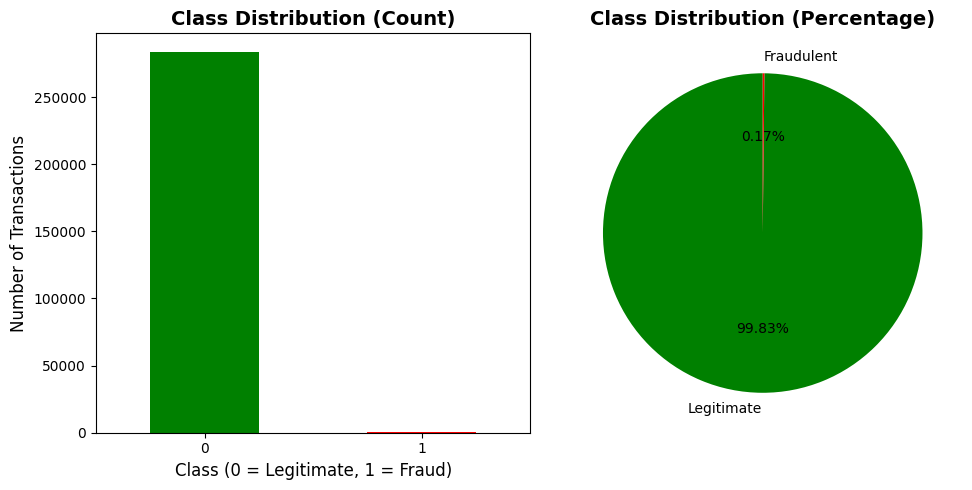

In [ ]:
print("\n[STEP 5] Analyzing Class Distribution (Imbalance)")
print("-" * 80)

# Count the number of fraudulent vs legitimate transactions
class_distribution = df['Class'].value_counts()

print("\nClass Distribution:")
print(f"Legitimate transactions (Class 0): {class_distribution[0]:,}")
print(f"Fraudulent transactions (Class 1): {class_distribution[1]:,}")

# Calculate percentage
fraud_percentage = (class_distribution[1] / len(df)) * 100
legitimate_percentage = (class_distribution[0] / len(df)) * 100

print(f"\nPercentage Distribution:")
print(f"Legitimate: {legitimate_percentage:.2f}%")
print(f"Fraudulent: {fraud_percentage:.2f}%")
print(f"\n⚠ Dataset is HIGHLY IMBALANCED (Imbalance Ratio: {class_distribution[0]/class_distribution[1]:.1f}:1)")

# Visualize class distribution
plt.figure(figsize=(10, 5))

# Bar plot
plt.subplot(1, 2, 1)
class_distribution.plot(kind='bar', color=['green', 'red'])
plt.title('Class Distribution (Count)', fontsize=14, fontweight='bold')
plt.xlabel('Class (0 = Legitimate, 1 = Fraud)', fontsize=12)
plt.ylabel('Number of Transactions', fontsize=12)
plt.xticks(rotation=0)

# Pie chart
plt.subplot(1, 2, 2)
plt.pie(class_distribution, labels=['Legitimate', 'Fraudulent'],
        autopct='%1.2f%%', colors=['green', 'red'], startangle=90)
plt.title('Class Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# ============================================================================
# STEP 7: Analyze Transaction Amount
# ============================================================================

In [ ]:
print("\n[STEP 6] Analyzing Transaction Amount")
print("-" * 80)


[STEP 6] Analyzing Transaction Amount
--------------------------------------------------------------------------------



Transaction Amount Statistics:
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

Amount Statistics by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      283253.0   88.413575  250.379023  0.0  5.67  22.00   77.46  25691.16
1         473.0  123.871860  260.211041  0.0  1.00   9.82  105.89   2125.87

Amount Statistics by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      283253.0   88.413575  250.379023  0.0  5.67  22.00   77.46  25691.16
1         473.0  123.871860  260.211041  0.0  1.00   9.82  105.89   2125.87


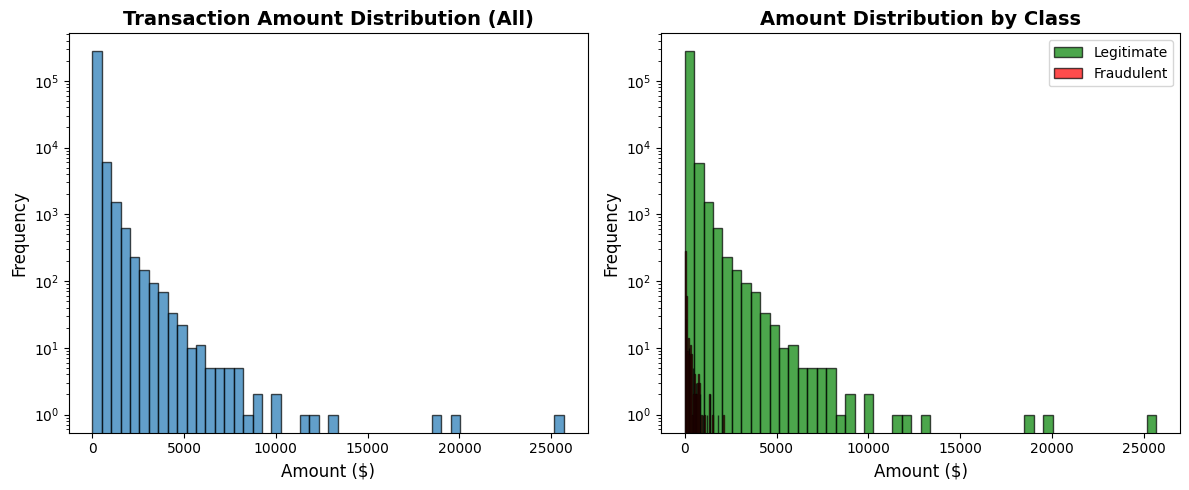

In [ ]:
# Statistical summary of Amount column
print("\nTransaction Amount Statistics:")
print(df['Amount'].describe())

# Separate statistics for fraud vs legitimate transactions
print("\nAmount Statistics by Class:")
print(df.groupby('Class')['Amount'].describe())
# Separate statistics for fraud vs legitimate transactions
print("\nAmount Statistics by Class:")
print(df.groupby('Class')['Amount'].describe())

# Visualize Amount distribution
plt.figure(figsize=(12, 5))

# Distribution for all transactions
plt.subplot(1, 2, 1)
plt.hist(df['Amount'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Transaction Amount Distribution (All)', fontsize=14, fontweight='bold')
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.yscale('log')  # Log scale due to high frequency at low amounts

# Distribution by class
plt.subplot(1, 2, 2)
legitimate = df[df['Class'] == 0]['Amount']
fraudulent = df[df['Class'] == 1]['Amount']

plt.hist(legitimate, bins=50, alpha=0.7, label='Legitimate', color='green', edgecolor='black')
plt.hist(fraudulent, bins=50, alpha=0.7, label='Fraudulent', color='red', edgecolor='black')
plt.title('Amount Distribution by Class', fontsize=14, fontweight='bold')
plt.xlabel('Amount ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.yscale('log')

plt.tight_layout()
plt.show()


In [ ]:
# ============================================================================
# STEP 8: Detect and Analyze Outliers
# ============================================================================


[STEP 7] Detecting Outliers in Amount Column
--------------------------------------------------------------------------------

Outlier Detection (using IQR method):
Q1 (25th percentile): $5.60
Q3 (75th percentile): $77.51
IQR: $71.91
Lower bound: $-102.27
Upper bound: $185.38

Number of outliers: 31,685 (11.17%)


/tmp/ipython-input-1445112542.py:38: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_to_plot, labels=['Legitimate', 'Fraudulent'])


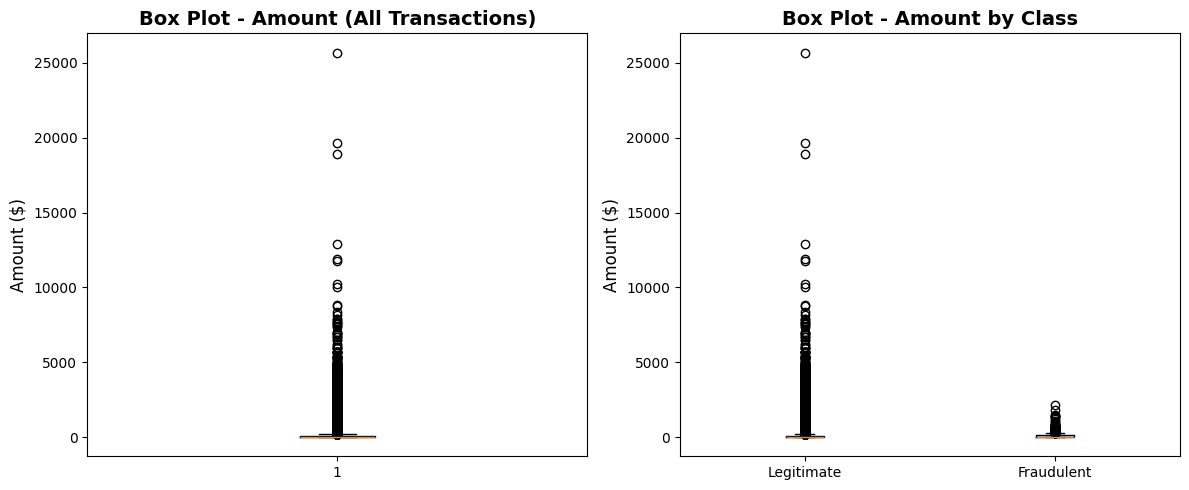


⚠ Note: Outliers are NOT removed in fraud detection datasets
   Reason: Unusual transactions might be fraudulent!


In [ ]:
print("\n[STEP 7] Detecting Outliers in Amount Column")
print("-" * 80)

# Calculate IQR (Interquartile Range) for outlier detection
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1
# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers
outliers = df[(df['Amount'] < lower_bound) | (df['Amount'] > upper_bound)]
outlier_count = len(outliers)


print(f"\nOutlier Detection (using IQR method):")
print(f"Q1 (25th percentile): ${Q1:.2f}")
print(f"Q3 (75th percentile): ${Q3:.2f}")
print(f"IQR: ${IQR:.2f}")
print(f"Lower bound: ${lower_bound:.2f}")
print(f"Upper bound: ${upper_bound:.2f}")
print(f"\nNumber of outliers: {outlier_count:,} ({(outlier_count/len(df))*100:.2f}%)")

# Box plot to visualize outliers
try:
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.boxplot(df['Amount'].values, vert=True)
    plt.title('Box Plot - Amount (All Transactions)', fontsize=14, fontweight='bold')
    plt.ylabel('Amount ($)', fontsize=12)

    plt.subplot(1, 2, 2)
    legitimate_amounts = df[df['Class'] == 0]['Amount'].values
    fraudulent_amounts = df[df['Class'] == 1]['Amount'].values
    data_to_plot = [legitimate_amounts, fraudulent_amounts]
    plt.boxplot(data_to_plot, labels=['Legitimate', 'Fraudulent'])
    plt.title('Box Plot - Amount by Class', fontsize=14, fontweight='bold')
    plt.ylabel('Amount ($)', fontsize=12)

    plt.tight_layout()
    plt.show()

except Exception as e:
    print(f"\n⚠ Error creating box plots: {e}")
    print("Continuing with analysis...")

print("\n⚠ Note: Outliers are NOT removed in fraud detection datasets")
print("   Reason: Unusual transactions might be fraudulent!")

In [ ]:
# ============================================================================
# STEP 9: Analyze Time Feature
# ============================================================================

In [ ]:
print("\n[STEP 8] Analyzing Time Feature")
print("-" * 80)

# Statistical summary of Time column
print("\nTime Feature Statistics:")
print(df['Time'].describe())

# Analyze time distribution for fraud vs legitimate
print("\nTime Statistics by Class:")
print(df.groupby('Class')['Time'].describe())


[STEP 8] Analyzing Time Feature
--------------------------------------------------------------------------------

Time Feature Statistics:
count    283726.000000
mean      94811.077600
std       47481.047891
min           0.000000
25%       54204.750000
50%       84692.500000
75%      139298.000000
max      172792.000000
Name: Time, dtype: float64

Time Statistics by Class:
          count          mean           std    min      25%      50%  \
Class                                                                  
0      283253.0  94835.058093  47475.550607    0.0  54233.0  84711.0   
1         473.0  80450.513742  48636.179973  406.0  41203.0  73408.0   

            75%       max  
Class                      
0      139308.0  172792.0  
1      129095.0  170348.0  


In [ ]:
# ============================================================================
# STEP 10: Feature Scaling/Normalization
# ============================================================================

In [ ]:
print("\n[STEP 9] Feature Scaling")
print("-" * 80)

# Create a copy of the dataframe for preprocessing
df_processed = df.copy()

# Separate features that need scaling
# 'Time' and 'Amount' are not anonymized and need scaling
# V1-V28 are already scaled (result of PCA transformation)

print("\nScaling 'Time' and 'Amount' columns...")

# Initialize StandardScaler
scaler = StandardScaler()

# Scale Time column
df_processed['Time_scaled'] = scaler.fit_transform(df_processed[['Time']])

# Scale Amount column
df_processed['Amount_scaled'] = scaler.fit_transform(df_processed[['Amount']])

print("✓ Scaling completed!")

# Compare original vs scaled values
print("\nComparison of Original vs Scaled Values (first 5 rows):")
comparison = pd.DataFrame({
    'Time_Original': df_processed['Time'].head(),
    'Time_Scaled': df_processed['Time_scaled'].head(),
    'Amount_Original': df_processed['Amount'].head(),
    'Amount_Scaled': df_processed['Amount_scaled'].head()
})
print(comparison)


[STEP 9] Feature Scaling
--------------------------------------------------------------------------------

Scaling 'Time' and 'Amount' columns...
✓ Scaling completed!

Comparison of Original vs Scaled Values (first 5 rows):
   Time_Original  Time_Scaled  Amount_Original  Amount_Scaled
0            0.0    -1.996823           149.62       0.244200
1            0.0    -1.996823             2.69      -0.342584
2            1.0    -1.996802           378.66       1.158900
3            1.0    -1.996802           123.50       0.139886
4            2.0    -1.996781            69.99      -0.073813


In [ ]:
# ============================================================================
# STEP 11: Correlation Analysis
# ============================================================================


In [ ]:
print("\n[STEP 10] Correlation Analysis")
print("-" * 80)

# Calculate correlation with target variable
correlations = df.corr()['Class'].sort_values(ascending=False)

print("\nTop 10 Features Most Correlated with Fraud:")
print(correlations.head(11))  # 11 because Class itself will be first

print("\nTop 10 Features Least Correlated with Fraud:")
print(correlations.tail(10))


[STEP 10] Correlation Analysis
--------------------------------------------------------------------------------

Top 10 Features Most Correlated with Fraud:
Class     1.000000
V11       0.149067
V4        0.129326
V2        0.084624
V19       0.033631
V8        0.033068
V21       0.026357
V27       0.021892
V20       0.021486
V28       0.009682
Amount    0.005777
Name: Class, dtype: float64

Top 10 Features Least Correlated with Fraud:
V9    -0.094021
V1    -0.094486
V18   -0.105340
V7    -0.172347
V3    -0.182322
V16   -0.187186
V10   -0.206971
V12   -0.250711
V14   -0.293375
V17   -0.313498
Name: Class, dtype: float64


In [ ]:
# ============================================================================
# STEP 12: Prepare Final Dataset
# ============================================================================

In [ ]:
# Replace original columns with scaled versions
df_final = df_processed.copy()
df_final['Time'] = df_final['Time_scaled']
df_final['Amount'] = df_final['Amount_scaled']
df_final = df_final.drop(['Time_scaled', 'Amount_scaled'], axis=1)

print(f"\n✓ Final preprocessed dataset shape: {df_final.shape}")
print(f"  Rows: {df_final.shape[0]:,}")
print(f"  Columns: {df_final.shape[1]}")


✓ Final preprocessed dataset shape: (283726, 31)
  Rows: 283,726
  Columns: 31


In [ ]:
# ============================================================================
# STEP 13: Split Data into Training and Testing Sets
# ============================================================================

In [ ]:
print("\n[STEP 12] Splitting Data into Train and Test Sets")
print("-" * 80)

# Separate features (X) and target (y)
X = df_final.drop('Class', axis=1)  # All columns except 'Class'
y = df_final['Class']  # Target variable

# Split data: 80% training, 20% testing
# stratify=y ensures both sets have same class distribution
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,  # 20% for testing
    random_state=42,  # For reproducibility
    stratify=y  # Maintain class distribution
)

print(f"\nTraining set size: {X_train.shape[0]:,} transactions")
print(f"Testing set size: {X_test.shape[0]:,} transactions")

print(f"\nTraining set class distribution:")
print(y_train.value_counts())
print(f"Fraud percentage: {(y_train.sum()/len(y_train))*100:.2f}%")

print(f"\nTesting set class distribution:")
print(y_test.value_counts())
print(f"Fraud percentage: {(y_test.sum()/len(y_test))*100:.2f}%")


[STEP 12] Splitting Data into Train and Test Sets
--------------------------------------------------------------------------------

Training set size: 226,980 transactions
Testing set size: 56,746 transactions

Training set class distribution:
Class
0    226602
1       378
Name: count, dtype: int64
Fraud percentage: 0.17%

Testing set class distribution:
Class
0    56651
1       95
Name: count, dtype: int64
Fraud percentage: 0.17%


In [ ]:
# ============================================================================
# STEP 14: Data Quality Summary Report
# ============================================================================

In [ ]:
print("\n" + "=" * 80)
print("DATA QUALITY REPORT - SUMMARY")
print("=" * 80)

print(f"""
DATASET OVERVIEW:
  • Source: Kaggle Credit Card Fraud Detection Dataset
  • Total transactions: {df.shape[0]:,}
  • Total features: {df.shape[1]}
  • Observation period: 2 days (September 2013)

DATA QUALITY ISSUES IDENTIFIED:

1. MISSING VALUES:
   • Status: No missing values detected ✓
   • Action: No imputation required

2. DUPLICATE RECORDS:
   • Status: {duplicate_count} duplicate rows found
   • Action: {'Removed duplicates' if duplicate_count > 0 else 'No action needed'}

3. CLASS IMBALANCE (CRITICAL):
   • Legitimate: {class_distribution[0]:,} ({legitimate_percentage:.2f}%)
   • Fraudulent: {class_distribution[1]:,} ({fraud_percentage:.2f}%)
   • Imbalance ratio: {class_distribution[0]/class_distribution[1]:.1f}:1
   • Impact: Severe imbalance may cause model bias toward majority class
   • Recommendation: Use SMOTE, undersampling, or class weights

4. OUTLIERS:
   • Detected: {outlier_count:,} outliers in Amount column ({(outlier_count/len(df))*100:.2f}%)
   • Action: Outliers retained (may indicate fraudulent behavior)

5. FEATURE SCALING:
   • V1-V28: Already scaled (PCA transformed)
   • Time: Scaled using StandardScaler ✓
   • Amount: Scaled using StandardScaler ✓

6. DATA TYPES:
   • All features: Numeric (float64/int64) ✓
   • Target variable: Binary (0/1) ✓

PREPROCESSING ACTIONS TAKEN:
  ✓ Loaded and explored dataset
  ✓ Checked for missing values
  ✓ Removed duplicate records
  ✓ Analyzed class distribution
  ✓ Detected and documented outliers
  ✓ Scaled Time and Amount features
  ✓ Split data into train/test sets (80/20)
  ✓ Maintained class distribution in splits

DATA READINESS:
  • Dataset is clean and preprocessed
  • Ready for model development
  • Imbalance handling required during modeling
  • Consider using: Random Forest, XGBoost, Neural Networks
  • Evaluation metrics: F1-Score, Precision, Recall, AUC-ROC
""")

print("=" * 80)
print("✓ EDA AND DATA QUALITY REPORT COMPLETE!")
print("=" * 80)


DATA QUALITY REPORT - SUMMARY

DATASET OVERVIEW:
  • Source: Kaggle Credit Card Fraud Detection Dataset
  • Total transactions: 283,726
  • Total features: 31
  • Observation period: 2 days (September 2013)

DATA QUALITY ISSUES IDENTIFIED:

1. MISSING VALUES:
   • Status: No missing values detected ✓
   • Action: No imputation required

2. DUPLICATE RECORDS:
   • Status: 1081 duplicate rows found
   • Action: Removed duplicates

3. CLASS IMBALANCE (CRITICAL):
   • Legitimate: 283,253 (99.83%)
   • Fraudulent: 473 (0.17%)
   • Imbalance ratio: 598.8:1
   • Impact: Severe imbalance may cause model bias toward majority class
   • Recommendation: Use SMOTE, undersampling, or class weights

4. OUTLIERS:
   • Detected: 31,685 outliers in Amount column (11.17%)
   • Action: Outliers retained (may indicate fraudulent behavior)

5. FEATURE SCALING:
   • V1-V28: Already scaled (PCA transformed)
   • Time: Scaled using StandardScaler ✓
   • Amount: Scaled using StandardScaler ✓

6. DATA TYPES:
 

In [ ]:
# ============================================================================
#  Save Preprocessed Data
# ============================================================================

In [ ]:
print("\n[OPTIONAL] Save Preprocessed Data")
print("-" * 80)


df_final.to_csv('creditcard_preprocessed.csv', index=False)
print("✓ Preprocessed data saved as 'creditcard_preprocessed.csv'")

print("\n✓ Analysis complete! Data is ready for ABT design and modeling.")


[OPTIONAL] Save Preprocessed Data
--------------------------------------------------------------------------------
✓ Preprocessed data saved as 'creditcard_preprocessed.csv'

✓ Analysis complete! Data is ready for ABT design and modeling.
